# CS559: Homework #2
Assignment #2: Due on 3/12/2021 by 11:59 PM

- Change the file name as YourName_S21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

## Problem 1 - Clustering Using KMeans [35 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW2_Q1_0.csv` containing coordinates of x and y. 

1-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [84]:
import pandas as pd
data = pd.read_csv('./data/HW2_Q1_0.csv')
data.columns = ['X' , 'Y']
data

,X,Y
0,-0.169793,1.073745
1,1.128729,-2.395042
2,0.122506,-0.973069
3,-0.409200,0.129649
4,0.476229,-0.048147
...,...,...
819,0.944727,0.365376
820,-0.161625,-0.358271
821,0.147787,0.905077
822,-0.159311,0.425800


1-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

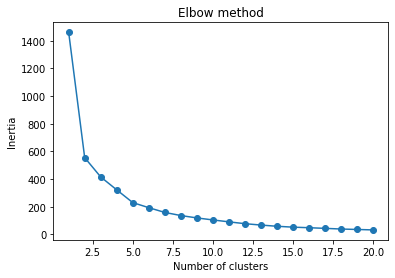

,Inertia
n = 1,1461.526463
n = 2,555.212132
n = 3,415.761864
n = 4,322.414097
n = 5,230.307761
n = 6,193.548412
n = 7,159.225708
n = 8,136.718179
n = 9,119.549877
n = 10,104.990928


In [7]:
plot_inertia(kmeans , data , range(1 , 21))

1-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

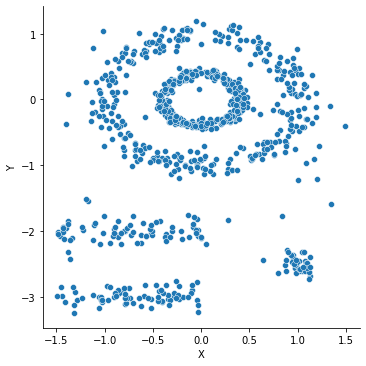

In [8]:
import seaborn as sns
sns.relplot(x = 'X' , y = 'Y' , data = data)

1-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [64]:
import random
import numpy as np
import pandas as pd

def MY_Kmean(data , k , iterations = 300):
    
    rows , cols = data.shape
    data = data.to_numpy()
    
    # randomly assign k centroids
    k_indices = random.sample(range(0 , rows) , k)
    centroids = {}
    for i in range(k):
        centroids[i] = data[k_indices[i]]
        
    for i in range(iterations):
        clusters = {}
        for i in range(k):
            clusters[i] = []

        for row in data:
            distances = [np.linalg.norm(row - centroids[centroid]) for centroid in centroids]
            closest_cluster = distances.index(min(distances))
            clusters[closest_cluster].append(row.tolist())

        prev_centroids = dict(centroids) # make a copy

        for cluster_no in clusters:
            centroids[cluster_no] = np.average(clusters[cluster_no] , axis=0)
            
    return (clusters , centroids)

        
    

1-e. Using `MY_KMeans` with the pre-determined $K$ value from 1-c, do the clustering.  After the clustering, find the centroid of each cluster id and report. (4 pts)

In [85]:
clusters , centroids = MY_Kmean(data , 5)
print('The centroids for each cluster are:')
print(centroids)

The centroids for each cluster are:
{0: array([-0.36171687, -0.49307047]), 1: array([ 0.59918755, -0.10519502]), 2: array([ 0.98796205, -2.39108108]), 3: array([-0.71233034, -2.48567719]), 4: array([-0.25252661,  0.53061744])}


1-f. Add the cluter label to the dataframe and call it `Class`. Make a plot and indicate the centroids. (2 pts)

In [73]:
def get_cluster_label(row):
    row = row.to_numpy().tolist()
    for cluster in clusters:
        if row in clusters[cluster]:
            return cluster
    return -1
    


In [86]:
data['Class'] = data.apply(lambda row : get_cluster_label(row) , axis = 1)

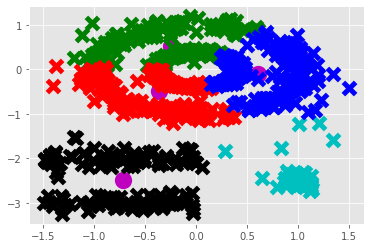

In [79]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
colors = 10*["g","r","c","b","k"]
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1],
                marker="o", color="m", s=150, linewidths=5)

for cluster in clusters:
    color = colors[cluster]
    for point in clusters[cluster]:
        plt.scatter(point[0], point[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

1-g. Load a given data set `HW2_Q1_1.csv`. Here you have true cluter ids. (4 pts)
- Make a box plot by the ids and make a discrete statistical analysis. Here, you also have to make a box plot with your result from 1-f and compare. 
- Is your pre-determined $K$ value the same as the true $K$ value? Explain. 
- If not, do the clustering again using `MY_KMeans` with the true $K$ value. 

In [82]:
import pandas as pd
data2 = pd.read_csv('./data/HW2_Q1_1.csv')
data2

,-0.452719933,-0.018212791,2
0,-0.169793,1.073745,1
1,1.128729,-2.395042,6
2,0.122506,-0.973069,1
3,-0.409200,0.129649,2
4,0.476229,-0.048147,2
...,...,...,...
819,0.944727,0.365376,1
820,-0.161625,-0.358271,2
821,0.147787,0.905077,1
822,-0.159311,0.425800,2


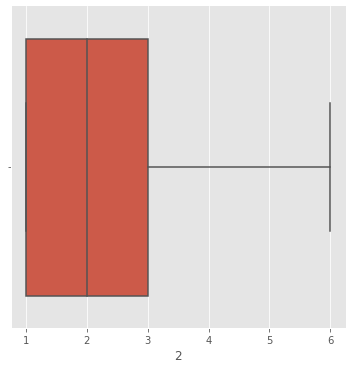

In [83]:
import seaborn as sns
sns.catplot(x = '2' , kind = 'box' , data = data2)

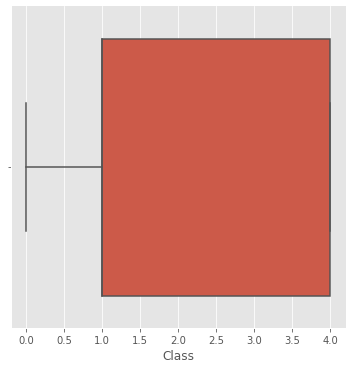

In [88]:
import seaborn as sns
sns.catplot(x = 'Class' , kind = 'box' , data = data)

In [91]:
clusters , centroids = MY_Kmean(data , 6)
print('The centroids for each cluster are:')
print(centroids)

The centroids for each cluster are:
{0: array([ 0.59918755, -0.10519502,  1.        ]), 1: array([ 0.93112054, -1.52394959,  2.        ]), 2: array([-0.36171687, -0.49307047,  0.        ]), 3: array([-0.71233034, -2.48567719,  3.        ]), 4: array([-0.25252661,  0.53061744,  4.        ]), 5: array([ 0.99524942, -2.50225178,  2.        ])}


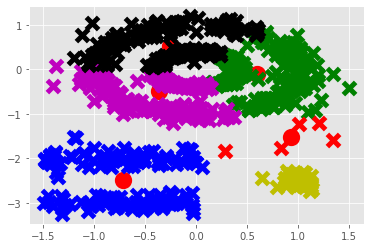

In [94]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
colors = 10*["g","r","m","b","k" , "y"]
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1],
                marker="o", color="r", s=150, linewidths=5)

for cluster in clusters:
    color = colors[cluster]
    for point in clusters[cluster]:
        plt.scatter(point[0], point[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

1-h. Evalaute your result. (5 pts)

## Problem 2 - Clustering Using Hierarchal Clustering [10 pts]

In this problem, you will make a dendrogram using Hierarchal clustering method and compare with the result you obtained from Problem #1. 

2-a. Do the hierarchal clustering with various distances and linkages. [8 pts]

In [109]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
def linkage_frame(data , method , metric):
    row_clusters = linkage(data, method=method, metric=metric)
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df


In [96]:
data.drop(['Class'] , axis = 1)

,X,Y
0,-0.169793,1.073745
1,1.128729,-2.395042
2,0.122506,-0.973069
3,-0.409200,0.129649
4,0.476229,-0.048147
...,...,...
819,0.944727,0.365376
820,-0.161625,-0.358271
821,0.147787,0.905077
822,-0.159311,0.425800


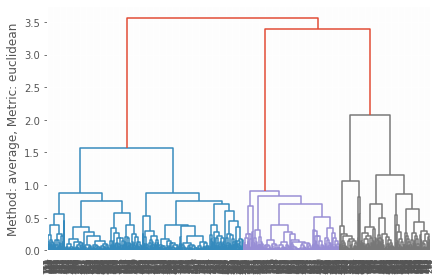

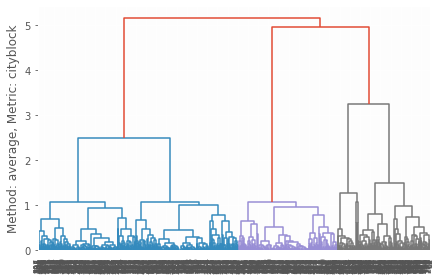

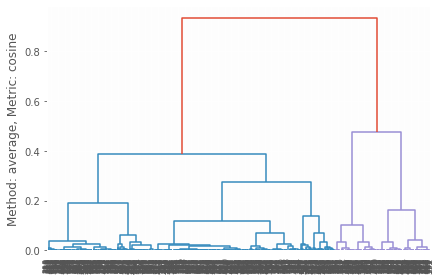

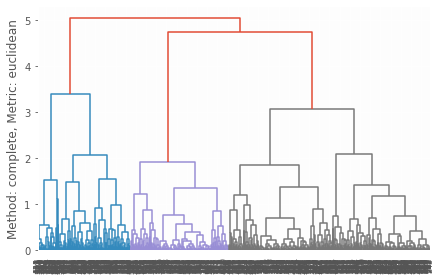

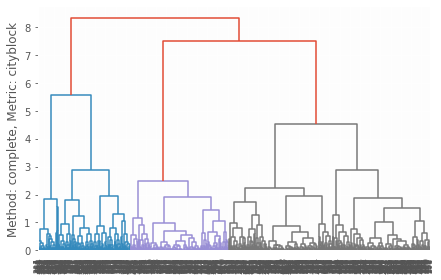

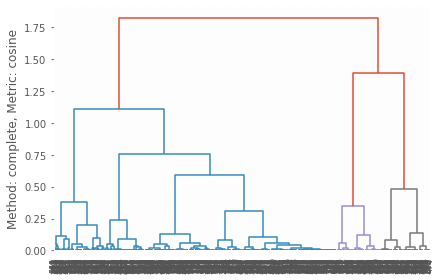

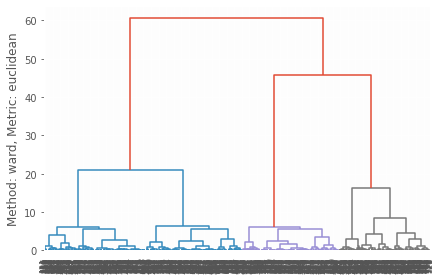

In [113]:
link_types = ['average' , 'complete']
metric_types = ['euclidean' , 'cityblock' , 'cosine']
for link_type in link_types:
    for metric_type in metric_types:
        linkage_df = linkage_frame(data.values , link_type , metric_type)
        row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
        plt.tight_layout()
        plt.ylabel(f'Method: {link_type}, Metric: {metric_type}')
        plt.show()
        
# ward , eucledian
linkage_df = linkage_frame(data.values , 'ward' , 'euclidean')
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Method: ward, Metric: euclidean')
plt.show()

2-b. Which distance and linkage provide the best and worst result? You can make numerical and/or graphical comparisons. For example, you can count the number of cluster IDs that are correctly clustered from the true labels and find its ratio. [2 pts]

## Problem 3 - Principal Component Analysis [15 pts]

3-a. Run the following codes. 

In [187]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

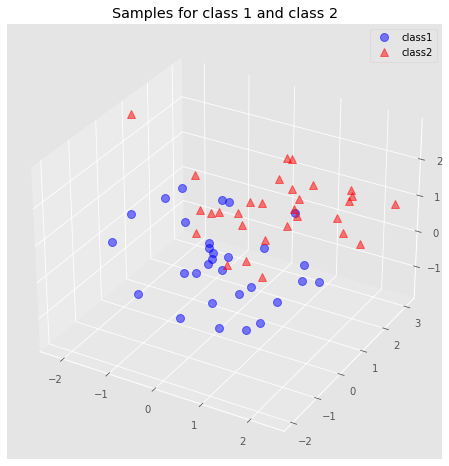

In [188]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

3-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [10 pts]

    1. Take the dataset w/o classes. 

In [189]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,60), "The matrix has not the dimensions 3x60"

    2. Compute the d-dimentional mean vector.

In [190]:
mean_x = np.mean(all_samples[0 , :])
mean_y = np.mean(all_samples[1 , :])
mean_z = np.mean(all_samples[2 , :])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.47343911]
 [0.52653958]
 [0.73360656]]


    3. Compute the scatter matrix as following. 
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
    where $\bar{\textbf{x}}$ is the mean vector.

In [191]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += ((all_samples[: , i] - mean_vector) * np.transpose(mean_vector - all_samples[: , i]))
    
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[-66.33488145 -15.78641252  -5.3207374 ]
 [-15.78641252 -73.06156823   3.30316783]
 [ -5.3207374    3.30316783 -73.75083116]]


    Then compute the covariance matrix using `np.cov()` function.

In [192]:
cov_mat = np.cov(scatter_matrix)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1064.56730689  -155.20475079  -757.61675228]
 [ -155.20475079  1579.40474229 -1280.74093046]
 [ -757.61675228 -1280.74093046  1782.39470553]]


    4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 

In [193]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(60 * '-')

Eigenvector 1: 
[[ 0.75178136]
 [-0.60045154]
 [-0.27254861]]
Eigenvalue 1 from scatter matrix: -51.797230184430404
Eigenvalue 1 from covariance matrix: -2.2737367544323206e-13
Scaling factor:  227806627497484.94
------------------------------------------------------------
Eigenvector 2: 
[[-0.63809873]
 [-0.76667006]
 [-0.07104244]]
Eigenvalue 2 from scatter matrix: -85.89450024480108
Eigenvalue 2 from covariance matrix: 1351.4611391725182
Scaling factor:  -0.06355676663954478
------------------------------------------------------------
Eigenvector 3: 
[[ 0.16629731]
 [-0.22732131]
 [ 0.95951562]]
Eigenvalue 3 from scatter matrix: -75.45555041070776
Eigenvalue 3 from covariance matrix: 3074.905615525146
Scaling factor:  -0.02453914358532957
------------------------------------------------------------


    5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 

In [194]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

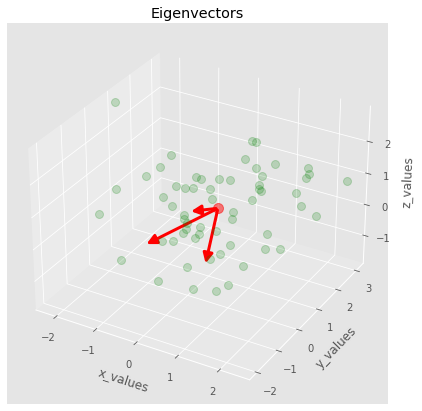

In [147]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

    6. Sort the eigenvectors by descreasing eigenvalues. 

    The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 

In [195]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key = lambda x : x[0] , reverse = True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)

(85.89450024480108, array([-0.63809873, -0.76667006, -0.07104244]))
(75.45555041070776, array([ 0.16629731, -0.22732131,  0.95951562]))
(51.797230184430404, array([ 0.75178136, -0.60045154, -0.27254861]))


   7. Choose *k* eigenvectors with the largest eigenvalues.

    We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.

In [196]:
k = 2
matrix_w = np.array([tup[1] for tup in  eig_pairs[0:k]])
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.63809873 -0.76667006 -0.07104244]
 [ 0.16629731 -0.22732131  0.95951562]]


In [197]:
matrix_w.shape

(2, 3)

    8. Transform the samples onto the new subspace. 

    The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [198]:
transformed = np.matmul(matrix_w , all_samples)
assert transformed.shape == (2,60), "The matrix is not 2x60 dimensional."

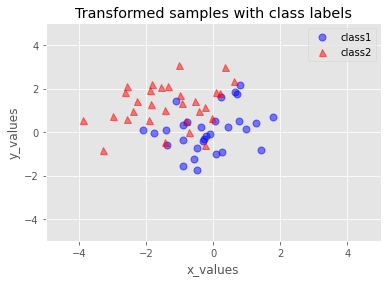

In [199]:
plt.plot(transformed[0,0:30], transformed[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,30:60], transformed[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

3-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

In [231]:
data = all_samples.copy()

In [232]:
reshaped_data = []
row = data.shape[1]
for i in range(rows):
    reshaped_data.append(data[: , i])
reshaped_data = np.array(reshaped_data)

In [233]:
from sklearn.preprocessing import StandardScaler
reshaped_data = StandardScaler().fit_transform(reshaped_data)

In [234]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(reshaped_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Projected X Values' , 'Projected Y Values'])

In [235]:
x_vals = principalDf.loc[: , 'Projected X Values'].values
y_vals = principalDf.loc[: , 'Projected Y Values'].values

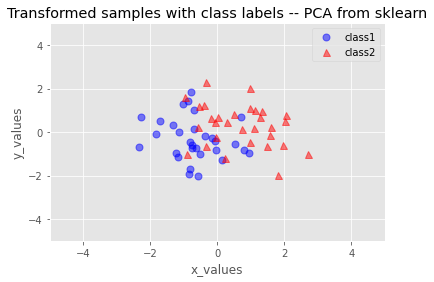

In [236]:
plt.plot(x_vals[0:30], y_vals[0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(x_vals[30:60], y_vals[30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels -- PCA from sklearn')

plt.show()

In [237]:
pca.explained_variance_ratio_

array([0.42043332, 0.33622477])

In [238]:
accuracy = sum(pca.explained_variance_ratio_)
print(f'Accuracy is : {accuracy}')

Accuracy is : 0.756658088283181
